Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Marius-Alexandru Gurita | 12122899 | 15.11.2021

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 -- Reading, handling and visualization of datasets </h2>

<b>Authors:</b> Brandstetter, Schäfl, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 18-10-2021

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

In [1]:
# Required packages and the u2_utils file
import u2_utils as u2
import IPython.display as ipd
import numpy as np
import spacy
from matplotlib.image import imread

u2.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.20.1 (✓)
Installed pandas version: 1.2.4 (✓)
Installed scikit-learn version: 0.24.1 (✓)
Installed matplotlib version: 3.3.4 (✓)
Installed scipy version: 1.6.2 (✓)
Installed spacy version: 3.2.0 (✓)


# Exercise 1

Following the instructions given in the lecture notebook, perform the tasks below:

- Plot the image of a tulip named `flower.jpg` (you will find this image in the folder `resources`)
- Load the image and print its dimensions (you will see that height and length/width are different to those from the image used in the lecture notebook)

**1.1. Plot the flower image.**

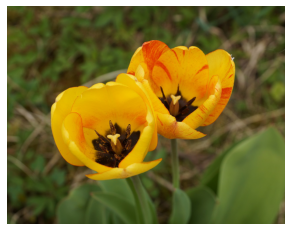

In [2]:
image_path = "flower.jpg"
u2.plot_image(image_path)

**1.2. Load and print the image's dimensions.**

In [3]:
img = imread(image_path)
print(img.shape)

(650, 830, 3)


# Exercise 2

By using the functions from `u2_utils.py` and working with the flower image, perform the tasks below:

- Plot the image with a transparency of 35% 
- Plot the image by flipping it horizontally
- Plot the histograms for each color channel in the image and try to find the good **color threshold** values to segment the image into flower and background

**2.1. Plot with transparency = 35%.**

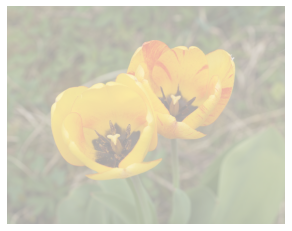

In [4]:
u2.plot_image_rgba(image_path, alpha=0.35)

**2.2. Plot horizontally flipped image.**

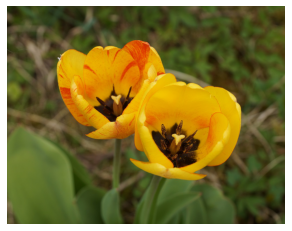

In [5]:
u2.plot_flipped_image(image_path, flipping="horizontal")

**2.3. Plot RGB channels and histograms.**

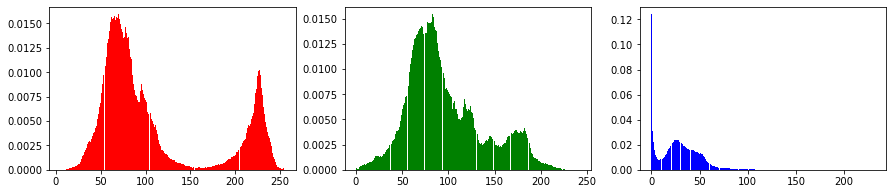

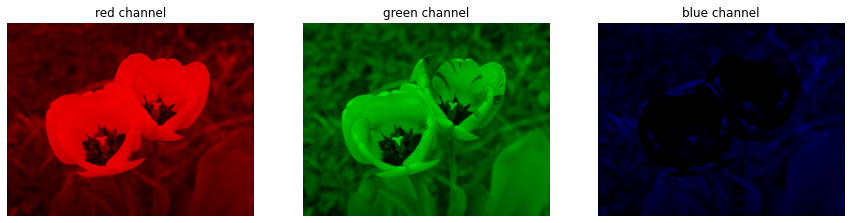

In [6]:
u2.plot_color_histograms(image_path)
u2.plot_image_channels_rgb(image_path)

**2.4. Segment the image.**

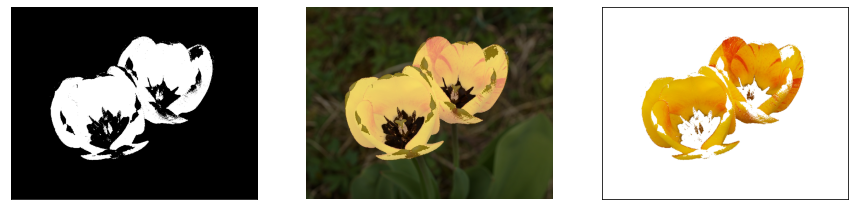

In [7]:
u2.segment_image(image_path, lower_threshold_r=110, upper_threshold_b=15)

# Exercise 3

With the functions from the file `u2_utils.py`, as shown in the lecture notebook, perform the tasks below:

- Generate three sine waves (all of them with a duration of 1 second, at a sampling rate of 24000 Hz) with the following frequencies: 349.228 Hz, 440 Hz and 523.251 Hz (in music terms, this is called an F major chord, here with the notes F4, A4 and C5). Then, add them together into a complex sound, plot the wave with `u2.plot_wave(...)` and generate a player to listen to it
- Use the `u2.apply_fourier_transform(...)` function to apply the discrete Fourier transform (DFT) to this complex sound and plot the output, i.e., decompose the complex sound into the original sine waves. Choose a meaningful maximum frequency when plotting the spectrum.

**3.1. Generate three sine waves, sum them up, plot the combined wave and generate a player to listen to the complex sound.**

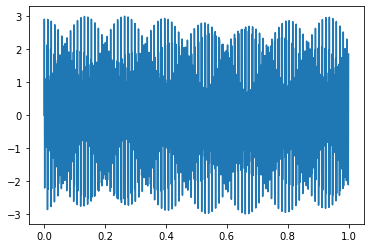

In [8]:
# frequency of the wave
T  = 1  # length of sound signal
sampling_rate = 24000  # sampling rate

points_of_wave = u2.generate_wave(349.228, T, sampling_rate)
points_of_wave1 = u2.generate_wave(440, T, sampling_rate)
points_of_wave2 = u2.generate_wave(523.251, T, sampling_rate)

points_of_wave_final = points_of_wave + points_of_wave1 + points_of_wave2

u2.plot_wave(points_of_wave_final, time=T, sampling_rate=sampling_rate)
ipd.Audio(points_of_wave_final, rate=sampling_rate)   

**3.2. Compute the discrete Fourier transform and plot the output.**

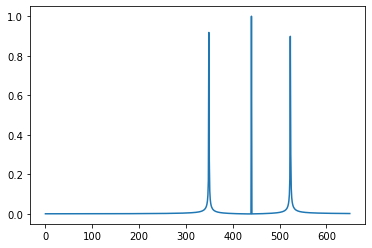

In [9]:
ft = u2.apply_fourier_transform(points_of_wave_final)
u2.plot_spectrum(ft, sampling_rate, max_freq=650)

# Exercise 4

By using the functions `u2.read_wav_file(...)` and `u2.apply_fourier_transform(...)` from `u2_utils.py`, perform the task below:

- Read the audio file named `audio.wav` from the `resources` folder.
- Apply Fourier analysis and plot the Fourier spectrum.
- Identify the frequencies of the two hidden sine waves. Hint, adapt `max_freq` from the `u2.plot_spectrum(...)` function.

**4.1. Read audio file, apply Fourier analysis and plot the resulting spectrum.**

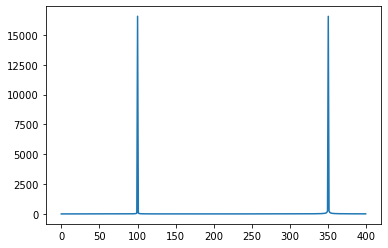

In [11]:
sound_path = "audio.wav"
T=10
points_audio, sampling_rate_audio = u2.read_wav_file(sound_path, time=T)
ft_points_audio = u2.apply_fourier_transform(points_audio)
u2.plot_spectrum(ft_points_audio, sampling_rate_audio, max_freq=400)

**4.2. What are the two frequencies?**

100 and  350

# Exercise 5

Following the instructions given in the lecture notebook, perform the tasks below:

- Download the word embedding model and load it by using the `spacy` library 
- Evaluate which two words have a higher similarity: "notebook" and "pen" or "cable" and "waterfall". Then, print out the result. Hint: You could use an if/else statement to make the comparison (feel free to investigate this option on the internet). Otherwise, simply evaluate both similarities manually and print the higher one.

**5.1. Download and load the word embedding.**

In [ ]:
!python -m spacy download en_core_web_md

**5.2. Evaluate similarity: "notebook" and "pen" vs. "cable" and "waterfall".**

In [ ]:
word_embedding_english = spacy.load('en_core_web_md')


In [ ]:
notebook = word_embedding_english('notebook')
pen = word_embedding_english('pen')
cable = word_embedding_english('cable')
waterfall = word_embedding_english('waterfall')

print(notebook.similarity(pen))
print(cable.similarity(waterfall))

# Exercise 6

With the functions from the file `u2_utils.py`, including `u2.apply_tsne(...)`, i.e., the function to apply the t-SNE algorithm for dimensionality reduction already described in the first lecture, perform the tasks below:

- Following the example given in the lecture notebook, create a list containing these words: "car", "cloud", "dark", "diesel", "exercise", "grade", "grim", "homework", "lecture", "motor", "night", "petrol", "rain", "school", "storm", "study", "teacher", "thunder", "tire", "transmission", "wheel". Hint: A list can be created with `my_list = [...]`, where `...` is the content.

- Get the embeddings of the words and display the result data frame.

- Down-project the 300-dimensional representation of each word to 2 dimensions by applying the t-SNE method, i.e., the function `u2.apply_tsne(...)`. Then, plot it in a 2D representation by using the function `u2.plot_word_embeddings_2d(...)`. Look for a fitting `perplexity` value in order to group the words into meaningful clusters. Hint: Setting the seed for the random number generator `np.random.seed(seed=...)` is not necessary but useful if you want reproducible results.

- Verify that the perplexity was correct by applying the PCA down-projection method and plotting the result in a 2D representation (this will clearly show the different clusters)

**6.1. Create a list with the indicated words.**

In [ ]:
my_list = ["car", "cloud", "dark", "diesel", "exercise", "grade", "grim", "homework", "lecture", "motor", "night", "petrol", "rain", "school", "storm", "study", "teacher", "thunder", "tire", "transmission", "wheel"]

**6.2. Get embeddings and display the data frame.**

In [ ]:
df_embeddings = u2.get_word_vectors(word_embedding_english, my_list)
df_embeddings

**6.3. Apply t-SNE and plot the resut in a 2D representation.**

In [ ]:
embeddings_tsne_2d = u2.apply_tsne(n_components=2, data=df_embeddings)
u2.plot_word_embeddings_2d(embeddings_tsne_2d)

**6.4. Apply PCA and plot the result in a 2D representation.**

In [ ]:
embeddings_pca_2d = u2.apply_pca(n_components=2, data=df_embeddings)
u2.plot_word_embeddings_2d(embeddings_pca_2d)